<a href="https://colab.research.google.com/github/Jerez-lab/ML-course/blob/main/02_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 2

## Задание 1

* 1) Реализовать kmeans 
* 2) Визуализировать сходимость центров кластеров
* 3) Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

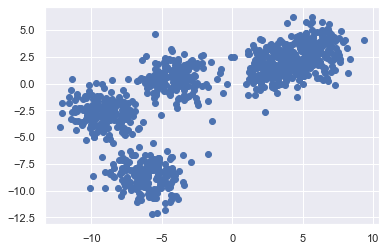

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

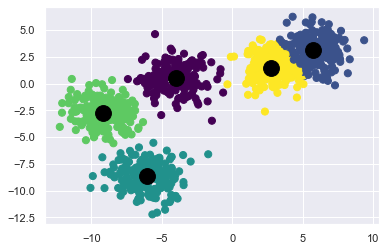

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=1);

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Случайным образом выбираем кластеры
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Назначим метки на основе ближайшего центра
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Находим новые центры с помощью точек
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Проверяем сходимость
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

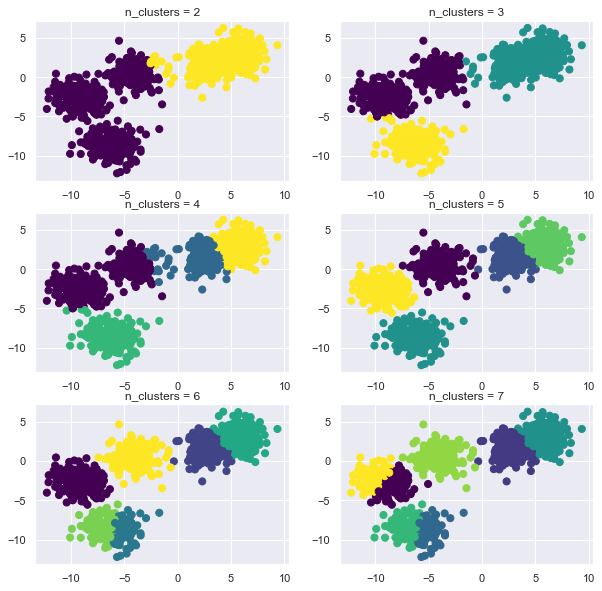

In [ ]:
plt.figure(figsize=(10,10))
for nw_crs in range (2,8):
    centers, labels = find_clusters(X, nw_crs)
    plt.subplot(3, 2, nw_crs-1)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');
    plt.title('n_clusters = {}'.format(nw_crs))
plt.show()    

In [ ]:
SSE = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)

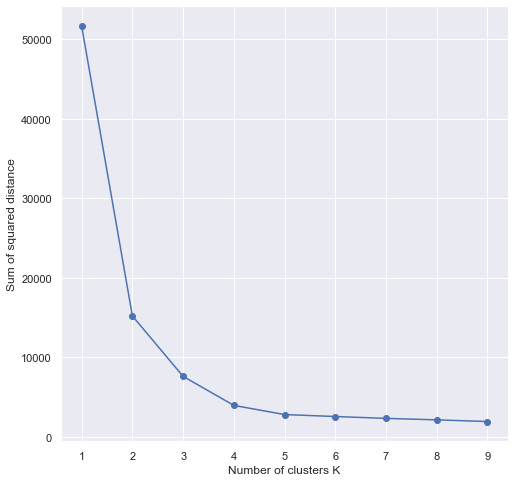

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');

## Задание 2

Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)
* 1) Кластеризуйте данные с помощью KMeans из sklearn.clustering.
* 2) Найдите оптимальное число кластеров
* 3) Произведите анализ получившихся кластеров:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

df_data = 'https://raw.githubusercontent.com/julia-komleva/ml-course-2021/main/data/2.csv'
df = pd.read_csv(df_data, encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Состояние     35019 non-null  object 
 3   Пробег        35019 non-null  float64
 4   Объем         35019 non-null  float64
 5   Топливо       35019 non-null  object 
 6   Мощность      35019 non-null  float64
 7   Кузов         35019 non-null  object 
 8   Привод        35019 non-null  object 
 9   КПП           35019 non-null  object 
 10  Руль          35019 non-null  object 
 11  Хозяев в ПТС  35019 non-null  object 
 12  Цена          35019 non-null  float64
dtypes: float64(5), object(8)
memory usage: 3.7+ MB


In [ ]:
df["Марка"].value_counts()

ВАЗ           5497
Toyota        2700
Nissan        2064
Hyundai       1897
Volkswagen    1885
              ... 
Oldsmobile       1
JAC              1
Changan          1
Tianma           1
Ravon            1
Name: Марка, Length: 92, dtype: int64

In [ ]:
for cl in df.columns:
    print(f"{cl}: {df[cl].nunique()}")

Марка: 92
Год: 28
Состояние: 1
Пробег: 3443
Объем: 45
Топливо: 5
Мощность: 303
Кузов: 11
Привод: 3
КПП: 4
Руль: 2
Хозяев в ПТС: 3
Цена: 1577


In [ ]:
# Удалим строку состояние, так как данный признак не нужен

df.drop("Состояние", axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Пробег        35019 non-null  float64
 3   Объем         35019 non-null  float64
 4   Топливо       35019 non-null  object 
 5   Мощность      35019 non-null  float64
 6   Кузов         35019 non-null  object 
 7   Привод        35019 non-null  object 
 8   КПП           35019 non-null  object 
 9   Руль          35019 non-null  object 
 10  Хозяев в ПТС  35019 non-null  object 
 11  Цена          35019 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.5+ MB


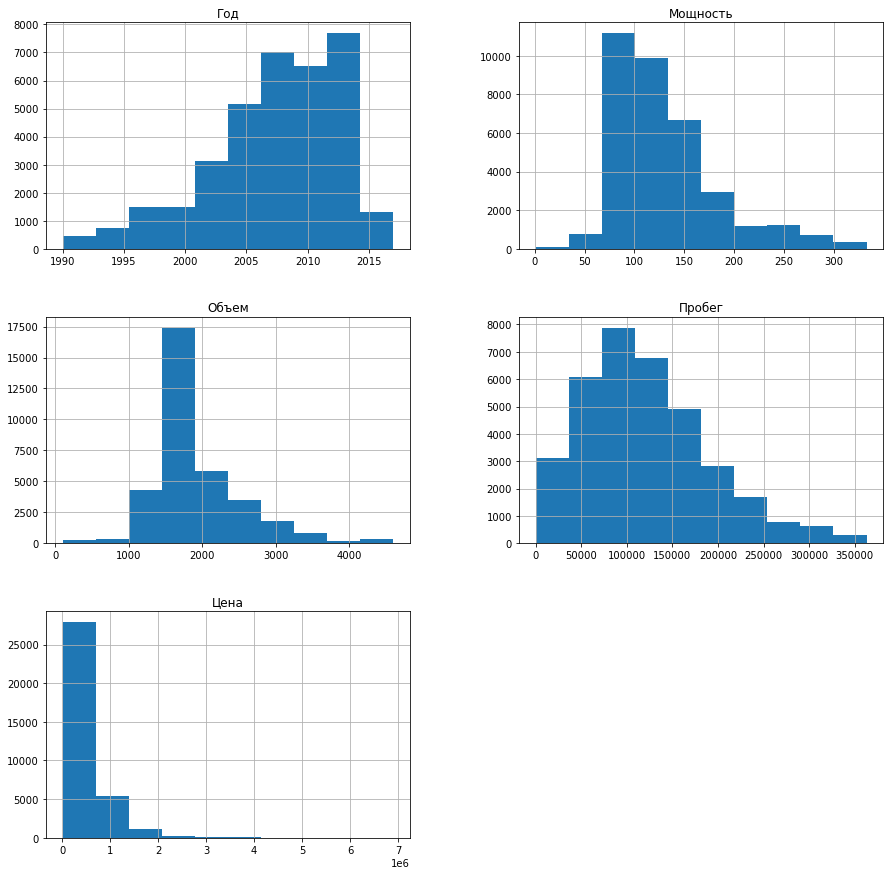

In [ ]:
hist = df.hist(figsize=(15,15))

In [ ]:
numeric_df = [col for col in df.columns if df[col].dtype == "float64"]
categorial_df = [col for col in df.columns if df[col].dtype == "object"]

In [ ]:
preprocessor = ColumnTransformer(transformers=[ 
        ('num', StandardScaler(), numeric_df),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_df)])

In [ ]:
prep_data = preprocessor.fit_transform(df).toarray()

In [ ]:
SSE = []
list_k = list(range(1, 11))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(prep_data)
    SSE.append(km.inertia_)

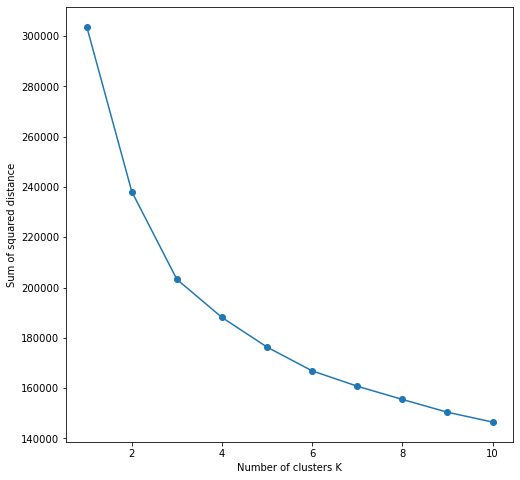

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(list_k, SSE, '-o')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');

In [ ]:
km = KMeans(n_clusters = 3)
clusters = km.fit_predict(prep_data)
df['cluster'] = clusters

In [ ]:
prep_df = df.copy(deep=True)
labels = []

for feature in categorial_df:
    lenc = LabelEncoder()
    prep_df[feature] = lenc.fit_transform(df[feature])
    labels.append({i : f for i, f in enumerate(lenc.classes_.tolist())})

In [ ]:
result = prep_df.groupby(by="cluster").median()
for feature, dictionary in zip(categorial_df, labels):
    result[feature] = result[feature].map(dictionary)

In [ ]:
# 1 кластер характеризует: Азиатские автомобили 2/3 поколения с малой мощностью двигателя за среднюю цену
# 2 кластер характеризует: Премиум автомобили 2/3 поколения с автоматической коробкой передач за среднюю рыночную стоимость
# 3 кластер характеризует: Старые французские или отечественные автомобили с 3+ владельцами за низкую стоимость

result

,Марка,Год,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
cluster,,,,,,,,,,,,
0,Nissan,2011.0,82000.0,1600.0,бензин,107.0,седан,передний,механика,левый,2 владельца,400000.0
1,Mercedes-Benz,2010.0,105000.0,2500.0,бензин,201.0,кроссовер,полный,автомат,левый,2 владельца,950000.0
2,Peugeot,2003.0,180000.0,1600.0,бензин,102.0,седан,передний,механика,левый,3 и более,180000.0
